In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# Load csv with readings as numpy array of strings
readings = np.loadtxt('/Volumes/LAYDENUSB/ramp_pd_readings.csv', delimiter=',', dtype='str')
# Convert the first column to seconds. Need to cut off the starting '10-07-' and convert from 'HH:MM:SS:MS' to seconds
readings[:,0] = [t[6:] for t in readings[:,0]]
time = np.array([float(h)*3600 + float(m)*60 + float(s) for h, m, s in [t.split(':') for t in readings[:,0]]])
readings[:,0] = time
# Convert whole array into floats
readings = readings.astype(float)
readings[:,1] *= 1e9

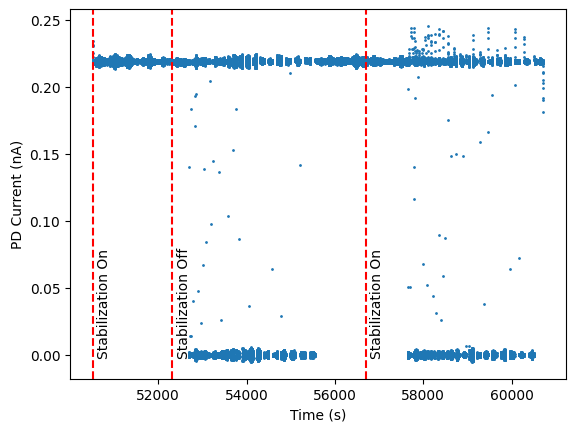

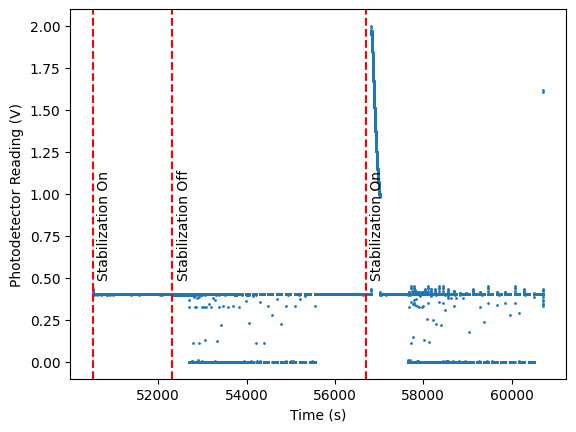

In [108]:
# First test began with stabilization off at 14:32:00
stab_off_time = 14 * 3600 + 32 * 60
# Test began with stabilization on at 15:45:00
stab_on_time = 15 * 3600 + 45 * 60
stab_off_readings = readings[(readings[:,0] > stab_off_time) & (readings[:,0] < stab_on_time)]
stab_on_readings = readings[readings[:,0] > stab_on_time]
plt.scatter(readings[:,0], readings[:,1], s=1)
plt.xlabel('Time (s)')
plt.ylabel('PD Current (nA)')
plt.axvline(x=readings[0,0], color='r', linestyle='--')
plt.axvline(x=stab_off_time, color='r', linestyle='--')
plt.axvline(x=stab_on_time, color='r', linestyle='--')
plt.text(readings[0,0] + 100, 1e-10, 'Stabilization On', rotation=90)
plt.text(stab_off_time + 100, 1e-10, 'Stabilization Off', rotation=90)
plt.text(stab_on_time + 100, 1e-10, 'Stabilization On', rotation=90)
plt.show()
plt.scatter(readings[:,0], readings[:,2], s=1)
# Put vertical lines where stabilization turned off and back on
plt.axvline(x=readings[0,0], color='r', linestyle='--')
plt.axvline(x=stab_off_time, color='r', linestyle='--')
plt.axvline(x=stab_on_time, color='r', linestyle='--')
plt.text(readings[0,0] + 100, 0.5, 'Stabilization On', rotation=90)
plt.text(stab_off_time + 100, 0.5, 'Stabilization Off', rotation=90)
plt.text(stab_on_time + 100, 0.5, 'Stabilization On', rotation=90)
plt.xlabel('Time (s)')
plt.ylabel('Photodetector Reading (V)')
plt.show()

In [111]:
# Measure the stability of the light source when stabilization is turned off.
# Only consider when the shutter was open, i.e. the PD readings was above 2e-10
pd_readings_stab_off = stab_off_readings[stab_off_readings[:,1] > 0.2][:,1]
print(pd_readings_stab_off.std() / pd_readings_stab_off.mean())
pd_readings_stab_on = stab_on_readings[stab_on_readings[:,1] > 0.2][:,1]
print(pd_readings_stab_on.std() / pd_readings_stab_on.mean())

0.006704771584729078
0.0076064704306755436


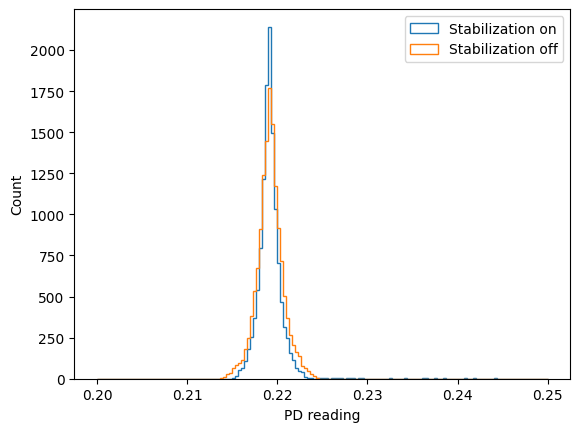

0.0036685470718961196
0.0052035431565996566


: 

In [135]:
# Set bounds to 0.2, 0.25
stab_on_hist = plt.hist(pd_readings_stab_on, bins=150, label='Stabilization on', histtype='step', range=(0.2, 0.25))
stab_off_hist = plt.hist(pd_readings_stab_off, bins=150, label='Stabilization off', histtype='step', range=(0.2, 0.25))
# Fit Gaussians to the histograms
# from scipy.optimize import curve_fit
# def gaussian(x, a, b, c):
#     return a * np.exp(-(x - b)**2 / (2 * c**2))
# x_off = stab_off_hist[1][:-1]
# y_off = stab_off_hist[0]
# x_on = stab_on_hist[1][:-1]
# y_on = stab_on_hist[0]
# popt_off, _ = curve_fit(gaussian, x_off, y_off, p0=[1000, 0.22, 0.002])
# popt_on, _ = curve_fit(gaussian, x_on, y_on, p0=[1000, 0.22, 0.002])
# y_off = gaussian(x_off, *popt_off)
# y_on = gaussian(x_on, *popt_on)
# plt.plot(x_on, y_on, label='Fit to on')
# plt.plot(x_off, y_off, label='Fit to off')
# plt.text(0.2225, 350, f'Off: {popt_off[1]:.2e} ± {popt_off[2]:.2e}', color='blue')
# plt.text(0.2225, 500, f'On: {popt_on[1]:.2e} ± {popt_on[2]:.2e}', color='orange')
plt.xlabel('PD reading')
plt.ylabel('Count')
plt.legend()
plt.show()
print(popt_on[2] / popt_on[1])
print(popt_off[2] / popt_off[1])